In [ ]:
pip install tensorflow

In [2]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import numpy as np
import random
from matplotlib import pyplot as plt

X = list(range(1,101, 1))
Y = list(range(100,0,-1))

trainingInput = np.array([ [x,y] for x in X for y in Y])
trainingOutput = np.array([ (x*y) for x in X for y in Y])

print(len(trainingInput),len(trainingOutput))

print("Input dataset;", trainingInput)
print("Outputs; ", trainingOutput)


10000 10000
Input dataset; [[  1 100]
 [  1  99]
 [  1  98]
 ...
 [100   3]
 [100   2]
 [100   1]]
Outputs;  [100  99  98 ... 300 200 100]


In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=0.925)

opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt, loss="mape")

history = model.fit(trainingInput, trainingOutput, 
                    batch_size=90, 
                    validation_split=0.1, 
                    epochs=20, 
                    verbose=1, 
                    shuffle=True)


Epoch 1/20
100/100 [==============================] - 2s 7ms/step - loss: 59.0024 - val_loss: 35.3168
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 26.0224 - val_loss: 35.5294
Epoch 3/20
100/100 [==============================] - 0s 5ms/step - loss: 15.7158 - val_loss: 19.5988
Epoch 4/20
100/100 [==============================] - 1s 5ms/step - loss: 9.4540 - val_loss: 22.3875
Epoch 5/20
100/100 [==============================] - 0s 4ms/step - loss: 6.3586 - val_loss: 7.0904
Epoch 6/20
100/100 [==============================] - 0s 5ms/step - loss: 5.8589 - val_loss: 10.0311
Epoch 7/20
100/100 [==============================] - 0s 5ms/step - loss: 4.9526 - val_loss: 7.4183
Epoch 8/20
100/100 [==============================] - 0s 4ms/step - loss: 3.2918 - val_loss: 5.5736
Epoch 9/20
100/100 [==============================] - 0s 5ms/step - loss: 3.8808 - val_loss: 3.0281
Epoch 10/20
100/100 [==============================] - 0s 5ms/step - loss: 3.7324 - val_loss

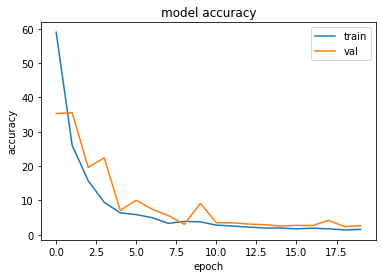

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [5]:
a = np.array([[10, 2], [3.5,4], [0.5, 21], [1.5, 48.6,], [25, 25], [-10, 10], [-5, 5], [-5,-5]])
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})
print(model.predict(a))

[[20.6768]
 [13.9131]
 [11.5023]
 [69.5876]
 [622.932]
 [-21.2774]
 [-12.0326]
 [-7.84043]]


[[0 4.60517]
 [0 4.59512]
 [0 4.58497]
 ...
 [4.60517 1.09861]
 [4.60517 0.693147]
 [4.60517 0]]
[4.60517 4.59512 4.58497 ... 5.70378 5.29832 4.60517]
Epoch 1/10
90/90 [==============================] - 1s 4ms/step - loss: 4.9077 - val_loss: 1.7177
Epoch 2/10
90/90 [==============================] - 0s 3ms/step - loss: 0.2998 - val_loss: 0.1496
Epoch 3/10
90/90 [==============================] - 0s 3ms/step - loss: 0.1425 - val_loss: 0.0875
Epoch 4/10
90/90 [==============================] - 0s 3ms/step - loss: 0.1068 - val_loss: 0.0811
Epoch 5/10
90/90 [==============================] - 0s 4ms/step - loss: 0.0778 - val_loss: 0.0543
Epoch 6/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0480 - val_loss: 0.0278
Epoch 7/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0408
Epoch 8/10
90/90 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 9/10
90/90 [==============================] - 0s 2ms/step -

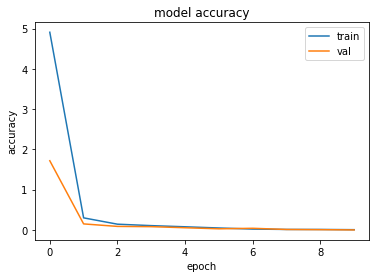

In [6]:
# Log version
import math

trainingInput = np.array([ [math.log(x),math.log(y)] for x in X for y in Y])
trainingOutput = np.array([ math.log(x) + math.log(y)  for x in X for y in Y])

print(trainingInput)
print(trainingOutput)

log_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(1, "linear"),
])

opt = keras.optimizers.Adam(learning_rate=0.01)
log_model.compile(optimizer=opt, loss="mae")

history = log_model.fit(trainingInput, trainingOutput, 
                        batch_size=100, 
                        validation_split=0.1, 
                        epochs=10, 
                        verbose=1, 
                        shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [7]:
a = np.array([[math.log(50), math.log(0.5)]])
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})
print(math.exp(log_model.predict(a)))

24.943328173334944
